In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader

from datetime import datetime

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,251.915913,246.217699,248.690595,249.305952,3.362332e+07,247.775753
std,43.782350,42.466963,42.954069,43.384756,1.719119e+07,43.808602
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,209.439999,206.737503,208.442505,208.609997,2.188935e+07,206.149715
50%,255.695000,243.590004,247.464996,247.985001,2.857305e+07,246.904030
75%,286.567505,280.055008,282.309998,284.657494,3.877955e+07,283.889023
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-17 to 2020-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


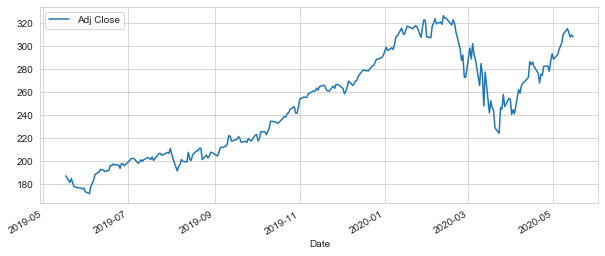

In [10]:
AAPL["Adj Close"].plot(legend=True, figsize=(10,4))

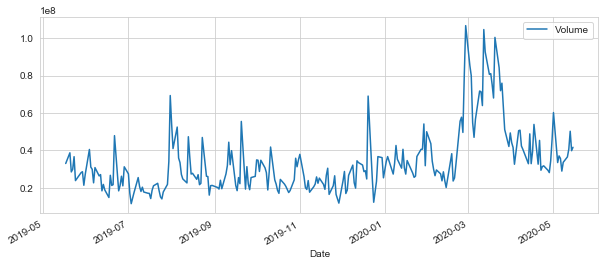

In [11]:
AAPL["Volume"].plot(legend=True, figsize=(10,4))

In [17]:
# pandasはもともと金融情報を扱うために作られていたので、色々な機能があります。

# 間隔ごとに移動平均を描いてみます。
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean()

In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2019-05-17,190.899994,186.759995,186.929993,189.000000,32879100.0,186.770996,NaN,NaN,NaN
2019-05-20,184.350006,180.279999,183.520004,183.089996,38612300.0,180.930695,NaN,NaN,NaN
2019-05-21,188.000000,184.699997,185.220001,186.600006,28364800.0,184.399307,NaN,NaN,NaN
2019-05-22,185.710007,182.550003,184.660004,182.779999,29748600.0,180.624329,NaN,NaN,NaN
2019-05-23,180.539993,177.809998,179.800003,179.660004,36529700.0,177.541138,NaN,NaN,NaN


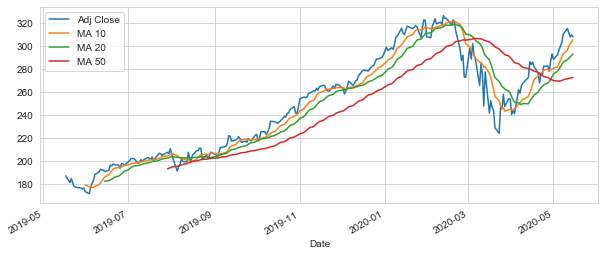

In [20]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [22]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2019-05-17,190.899994,186.759995,186.929993,189.000000,32879100.0,186.770996,NaN,NaN,NaN,NaN
2019-05-20,184.350006,180.279999,183.520004,183.089996,38612300.0,180.930695,NaN,NaN,NaN,-0.031270
2019-05-21,188.000000,184.699997,185.220001,186.600006,28364800.0,184.399307,NaN,NaN,NaN,0.019171
2019-05-22,185.710007,182.550003,184.660004,182.779999,29748600.0,180.624329,NaN,NaN,NaN,-0.020472
2019-05-23,180.539993,177.809998,179.800003,179.660004,36529700.0,177.541138,NaN,NaN,NaN,-0.017070


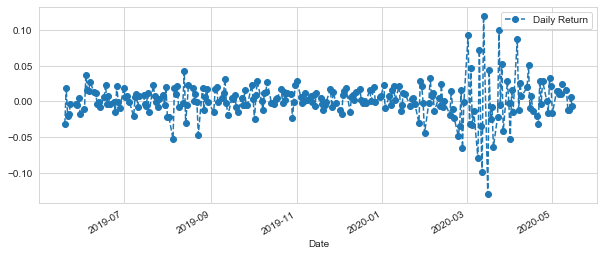

In [23]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

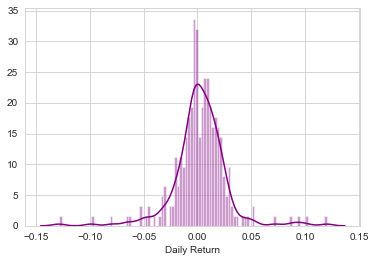

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

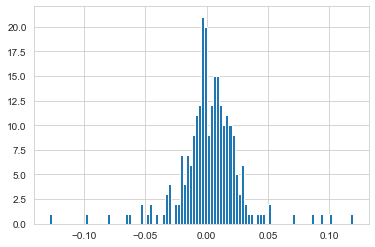

In [26]:
AAPL['Daily Return'].hist(bins=100)

In [27]:
 closing_df = DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'yahoo', start, end)['Adj Close']

In [28]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-17,186.770996,1162.300049,126.865570,1869.000000
2019-05-20,180.930695,1138.849976,125.032967,1858.969971
2019-05-21,184.399307,1149.630005,125.706573,1857.520020
2019-05-22,180.624329,1151.420044,126.469322,1859.680054
2019-05-23,177.541138,1140.770020,124.993340,1815.479980


In [29]:
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-17,NaN,NaN,NaN,NaN
2019-05-20,-0.031270,-0.020176,-0.014445,-0.005367
2019-05-21,0.019171,0.009466,0.005387,-0.000780
2019-05-22,-0.020472,0.001557,0.006068,0.001163
2019-05-23,-0.017070,-0.009249,-0.011671,-0.023768


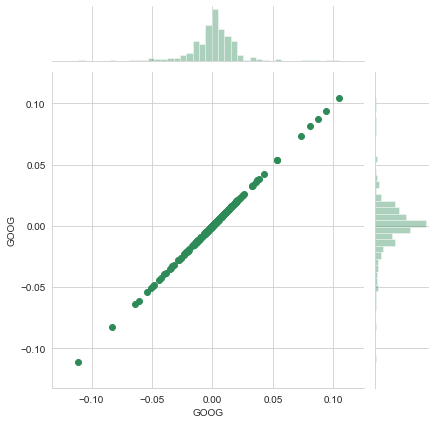

In [31]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

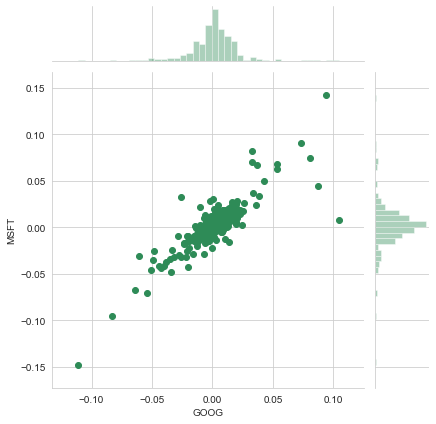

In [33]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

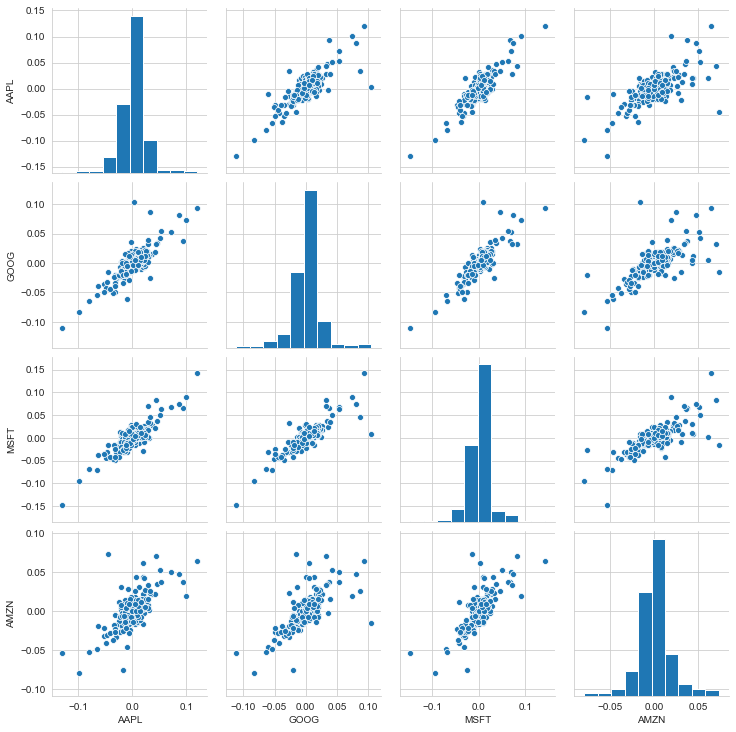

In [35]:
sns.pairplot(tech_rets.dropna())

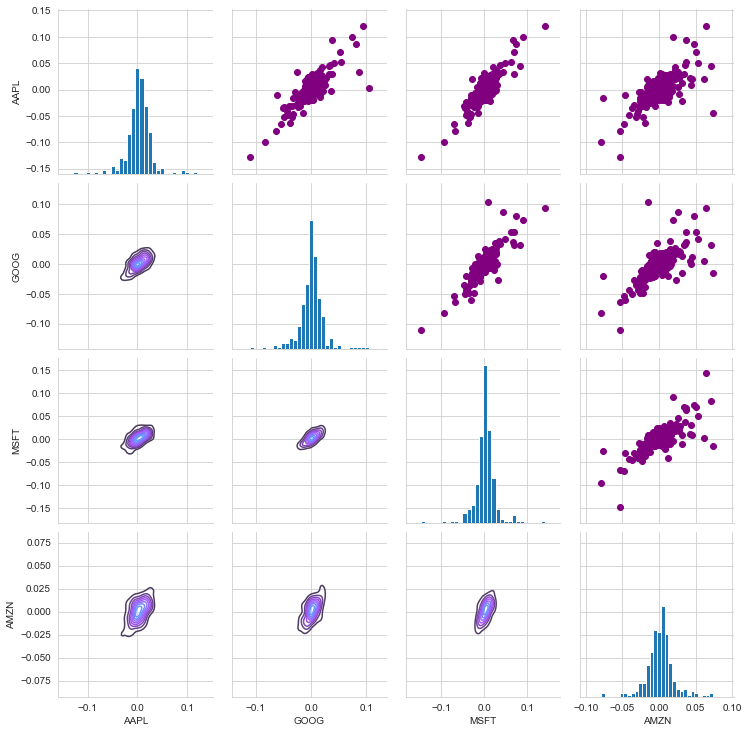

In [36]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

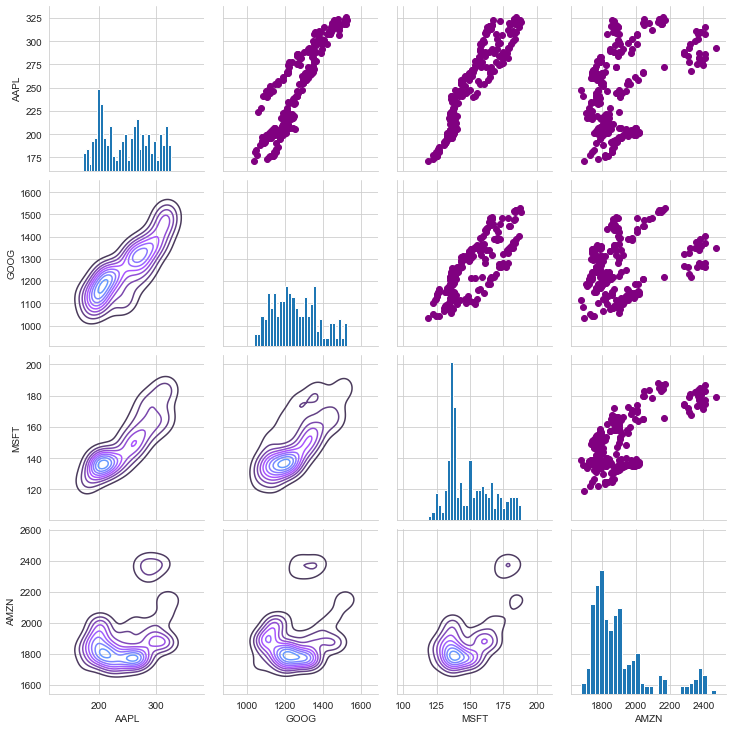

In [37]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

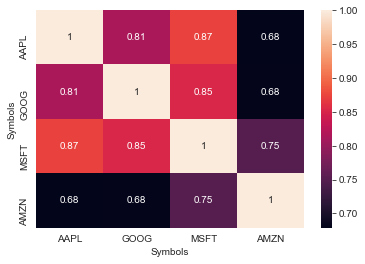

In [39]:
sns.heatmap(tech_rets.corr(), annot=True)

In [41]:
rets = tech_rets.dropna()

In [42]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-20,-0.031270,-0.020176,-0.014445,-0.005367
2019-05-21,0.019171,0.009466,0.005387,-0.000780
2019-05-22,-0.020472,0.001557,0.006068,0.001163
2019-05-23,-0.017070,-0.009249,-0.011671,-0.023768
2019-05-24,-0.003841,-0.006399,0.000475,0.004296


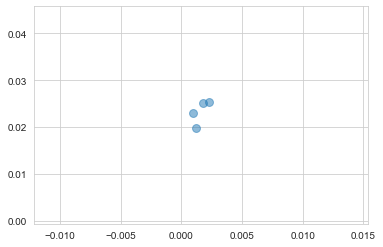

In [43]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)

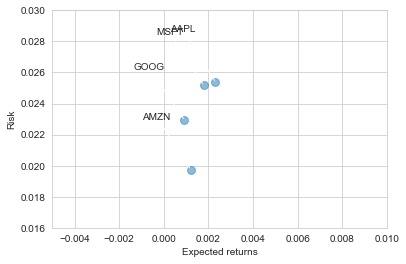

In [60]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)
plt.ylim([0.016, 0.03])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 50),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))

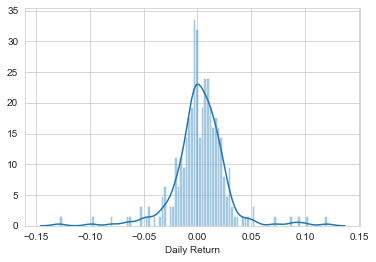

In [62]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [63]:
rets['AAPL'].quantile(0.05)

-0.03315459757901379

In [64]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [69]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' この関数は、シミュレーションの結果の価格リストを返します。'''
    
    # 戻り値となる価格のリストを返します。
    price = np.zeros(days)
    price[0] = start_price
    # Shock と Driftです。
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで、計算します。
    for x in range(1,days):
        #  shockを計算します
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算します。
        drift[x] = mu * dt
        # これらを使って価格を計算します。
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [70]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-17,1180.150024,1160.010010,1168.469971,1162.300049,1208600,1162.300049
2019-05-20,1146.796997,1131.442993,1144.500000,1138.849976,1353300,1138.849976
2019-05-21,1152.708008,1137.939941,1148.489990,1149.630005,1159800,1149.630005
2019-05-22,1158.520020,1145.890015,1146.750000,1151.420044,914500,1151.420044
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,1140.770020


Text(0.5, 1.0, 'Monte Carlo Analysis')

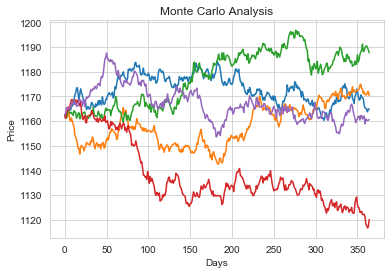

In [73]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [74]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 1., 0., ..., 0., 1., 1.]),
 array([1072.62273681, 1073.63114581, 1074.6395548 , ..., 1272.28771774,
        1273.29612673, 1274.30453573]),
 <a list of 200 Patch objects>)

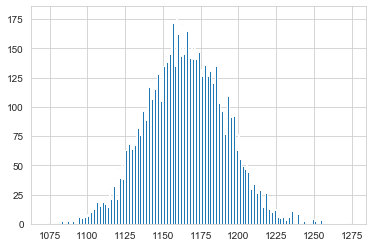

In [75]:
plt.hist(simulations, bins=200)

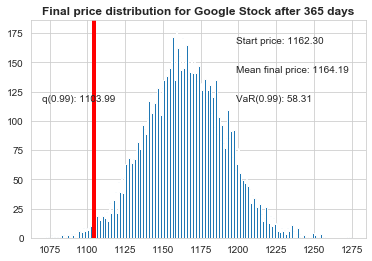

In [76]:
# 最終的な株価のヒストグラムを表示します。
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定します。
q = np.percentile(simulations, 1)

# プロットに追加的な情報を載せます。

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');